In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.metrics import silhouette_score as sil

In [6]:
df=pd.read_csv('C:\\Users\\Nidhi\\Downloads\\iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.drop(['Id','Species'],axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.skew()

SepalLengthCm    0.314543
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.117256
dtype: float64

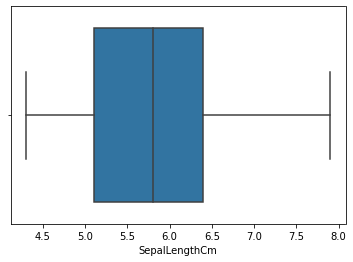

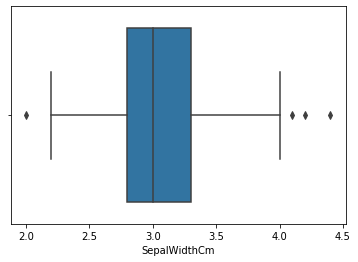

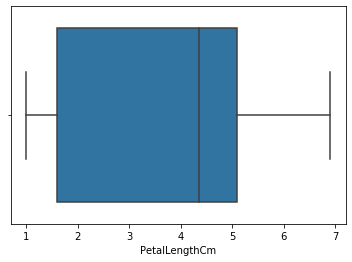

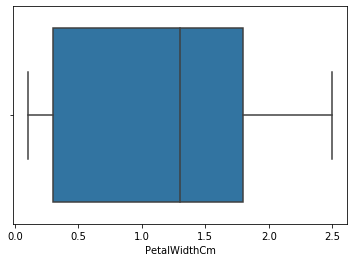

In [12]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [13]:
df.isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
dtype: int64

In [14]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,151.000000,150.000000,150.000000,151.000000
mean,5.843709,3.054000,3.758667,1.202649
std,0.825314,0.433594,1.764420,0.762185
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
for i in df.columns:
    df[i].fillna(df[i].median(),inplace=True)

In [18]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [19]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


In [20]:
df.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.676645,-0.038753,1.256864,0.509922
SepalWidthCm,-0.038753,0.185552,-0.317869,-0.116667
PetalLengthCm,1.256864,-0.317869,3.076516,1.281932
PetalWidthCm,0.509922,-0.116667,1.281932,0.577141


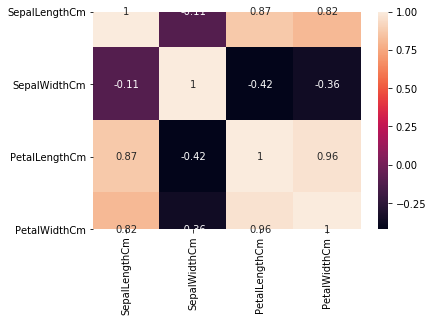

In [22]:
sns.heatmap(df.corr(),annot=True)

In [25]:
pca=PCA()
sc=StandardScaler()
x_sc=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
x_sc.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.90675,1.040463,-1.353632,-1.325008
1,-1.15069,-0.124120,-1.353632,-1.325008
2,-1.39463,0.341713,-1.410833,-1.325008
3,-1.51660,0.108797,-1.296431,-1.325008
4,-1.02872,1.273380,-1.353632,-1.325008


In [26]:
pca.fit(x_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.explained_variance_

array([2.92811498, 0.92721001, 0.15013846, 0.02102662])

In [28]:
pca.explained_variance_ratio_

array([0.72721277, 0.23027749, 0.03728768, 0.00522207])

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72721277, 0.95749025, 0.99477793, 1.        ])

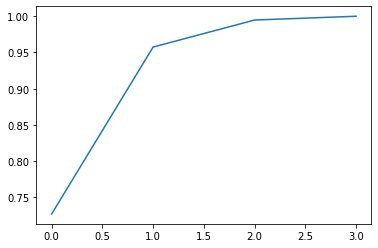

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [32]:
pd.DataFrame(pca.components_)

,0,1,2,3
0,0.522170,-0.263676,0.581411,0.565486
1,0.372894,0.925331,0.021273,0.065262
2,-0.720041,0.242168,0.138524,0.635379
3,-0.264253,0.124865,0.801449,-0.521785


In [35]:
pca=PCA(0.95)
pca.fit(x_sc)
pca.explained_variance_

array([2.92811498, 0.92721001])

In [37]:
(pca.explained_variance_ratio_).sum()

0.9574902519007282

In [40]:
pca_data=pd.DataFrame(pca.fit_transform(x_sc))
pca_data.head()

,0,1
0,-2.284113,0.509382
1,-2.104419,-0.659207
2,-2.387883,-0.320337
3,-2.323643,-0.578910
4,-2.409217,0.679426


In [44]:
inertia=[]
for i in range(1,7):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(pca_data)
    inertia.append(km.inertia_)

In [45]:
inertia

[582.1540731556427,
 202.00755903865803,
 118.68313407110912,
 91.78125995021855,
 67.71655009941308,
 58.23822839159044]

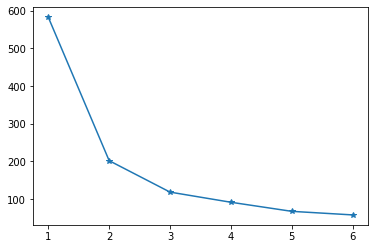

In [51]:
plt.plot(range(1,7),inertia,marker='*')

In [65]:
score=[]
for i in range(2,10):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(pca_data)
    ss=sil(pca_data,km.labels_)
    score.append(ss)

In [66]:
score

[0.6134744790165106,
 0.5055845969845896,
 0.44315154141132534,
 0.42016658285845127,
 0.43113163034600943,
 0.43935054796284045,
 0.45467175770746404,
 0.4426155761076983]

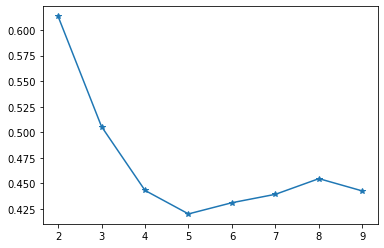

In [67]:
plt.plot(range(2,10),score,marker='*')

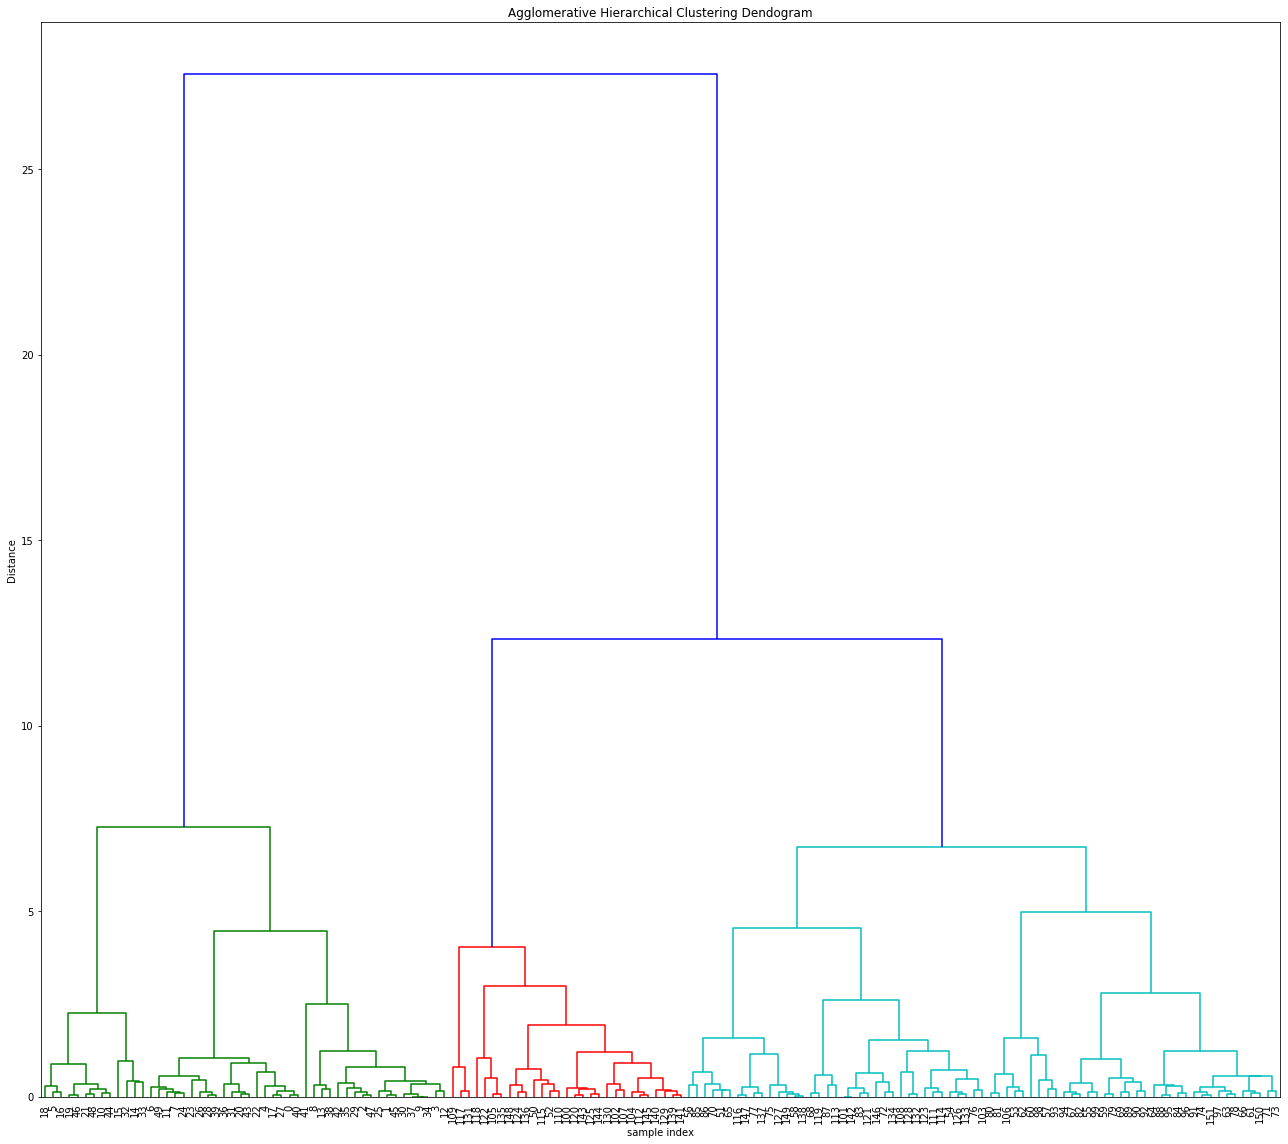

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(pca_data, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=30,color_threshold=10,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [73]:
km=KMeans(n_clusters=3,random_state=1)
km.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [74]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0])

In [75]:
km_data=pca_data.copy()


In [76]:
km_data['clusters']=km.predict(pca_data)

In [77]:
km_data.head()

,0,1,clusters
0,-2.284113,0.509382,1
1,-2.104419,-0.659207,1
2,-2.387883,-0.320337,1
3,-2.323643,-0.578910,1
4,-2.409217,0.679426,1


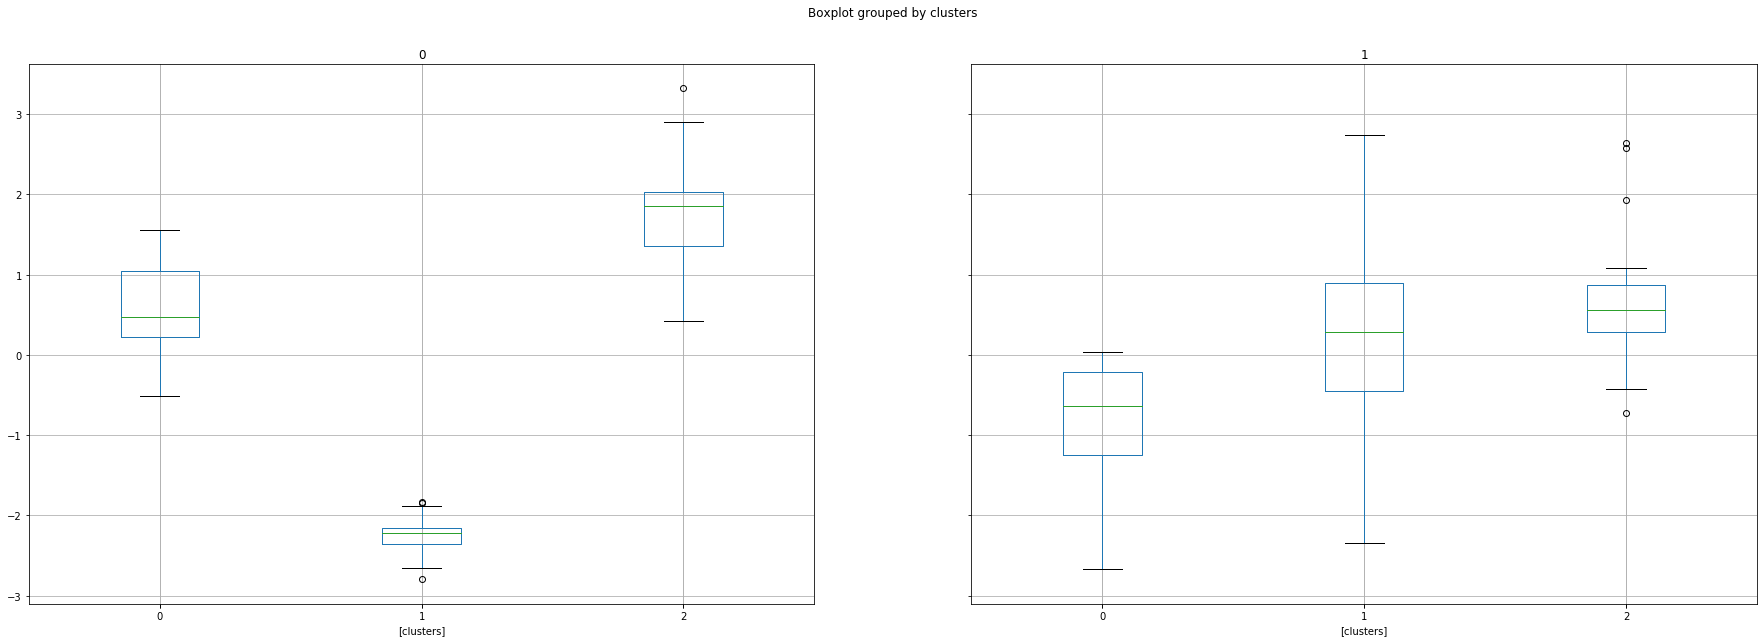

In [78]:
km_data.boxplot(by='clusters',figsize=(30,10))
plt.show()

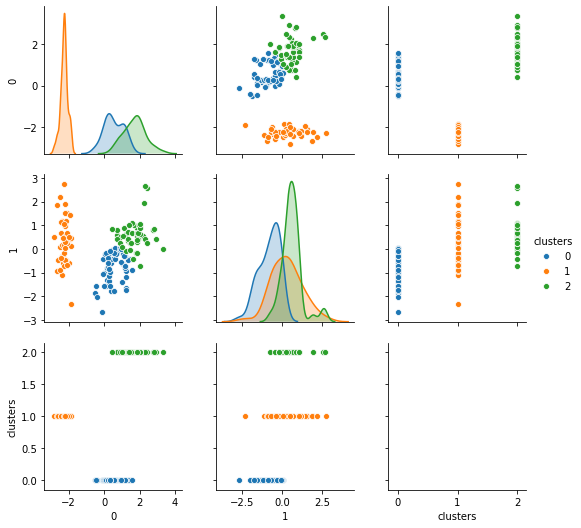

In [83]:
sns.pairplot(km_data[:-1],diag_kind='kde',hue='clusters')

In [84]:
#lets try to look with agglomerative clustering with 3 clusters

agg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [85]:
agg.fit(pca_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [86]:
agg_data=pca_data.copy()
agg_data['cluster']=agg.labels_

In [87]:
agg_data.head()

,0,1,cluster
0,-2.284113,0.509382,0
1,-2.104419,-0.659207,0
2,-2.387883,-0.320337,0
3,-2.323643,-0.578910,0
4,-2.409217,0.679426,0


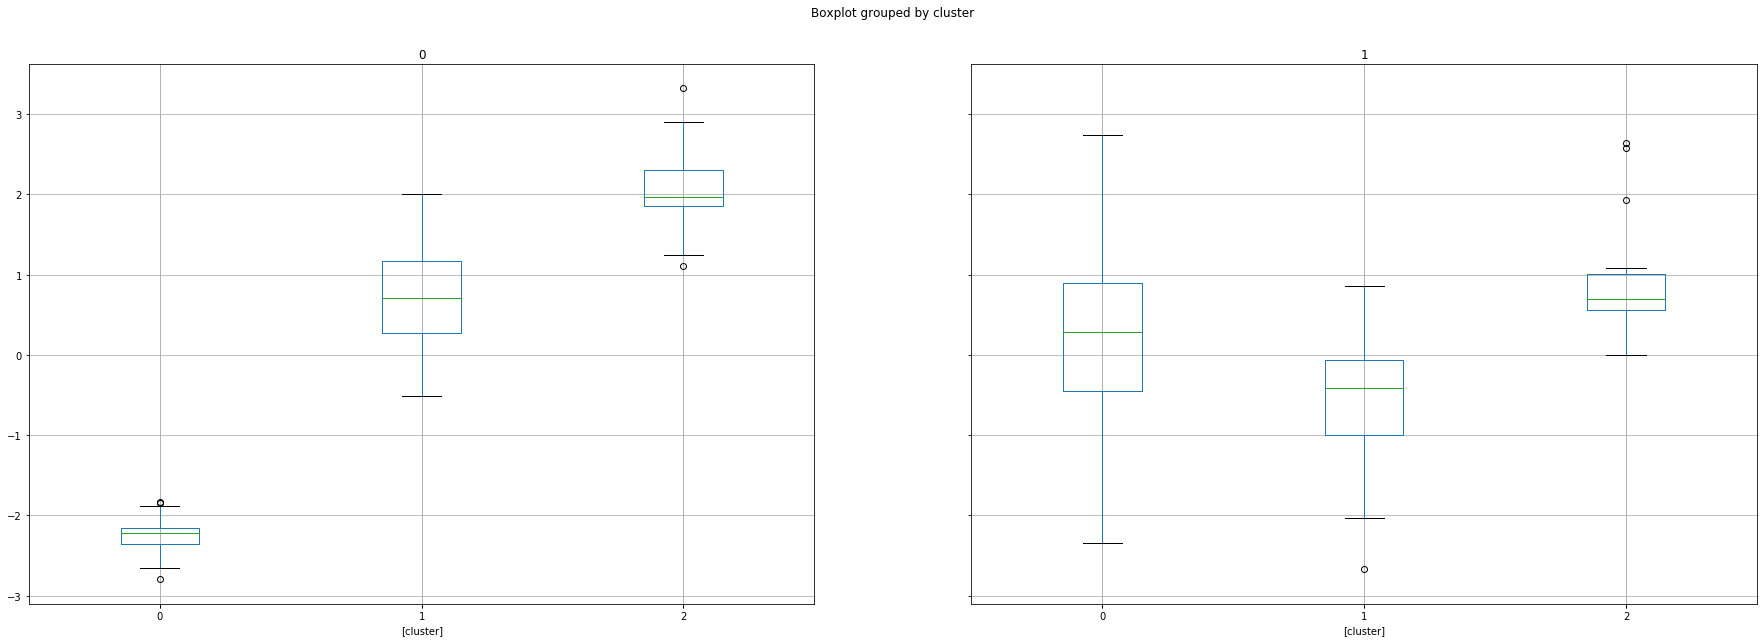

In [89]:
agg_data.boxplot(by='cluster',figsize=(30,10))
plt.show()

C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


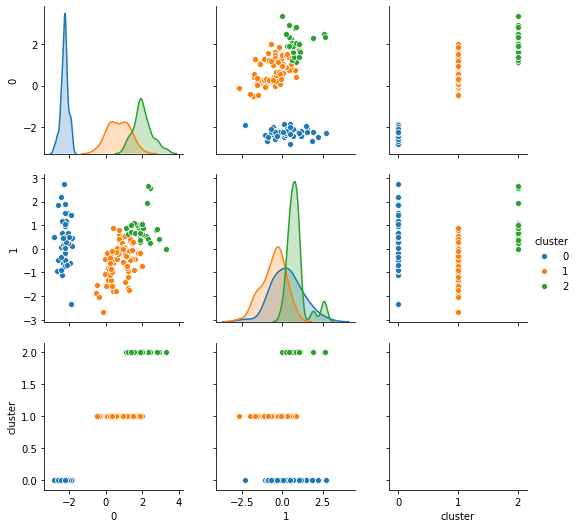

In [90]:
sns.pairplot(agg_data[:-1],diag_kind='kde',hue='cluster')

# Without PCA

In [92]:
x_sc.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.90675,1.040463,-1.353632,-1.325008
1,-1.15069,-0.124120,-1.353632,-1.325008
2,-1.39463,0.341713,-1.410833,-1.325008
3,-1.51660,0.108797,-1.296431,-1.325008
4,-1.02872,1.273380,-1.353632,-1.325008


In [104]:
inertia=[]

for i in range(1,7):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(x_sc)
    
    inertia.append(km.inertia_)
   

In [99]:
inertia

[608.0,
 227.66870615772535,
 144.14089969339577,
 117.2846554771252,
 93.05194022939588,
 82.48134787459747]

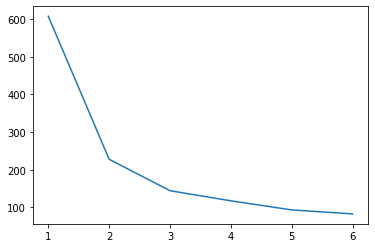

In [100]:
plt.plot(range(1,7),inertia)

In [105]:

score=[]
for i in range(2,7):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(x_sc)
    ss=sil(x_sc,km.labels_)
    
    score.append(ss)

In [106]:
score

[0.5803180928902831,
 0.45610676162123404,
 0.3870448752872829,
 0.3469207487617431,
 0.3366086383991645]

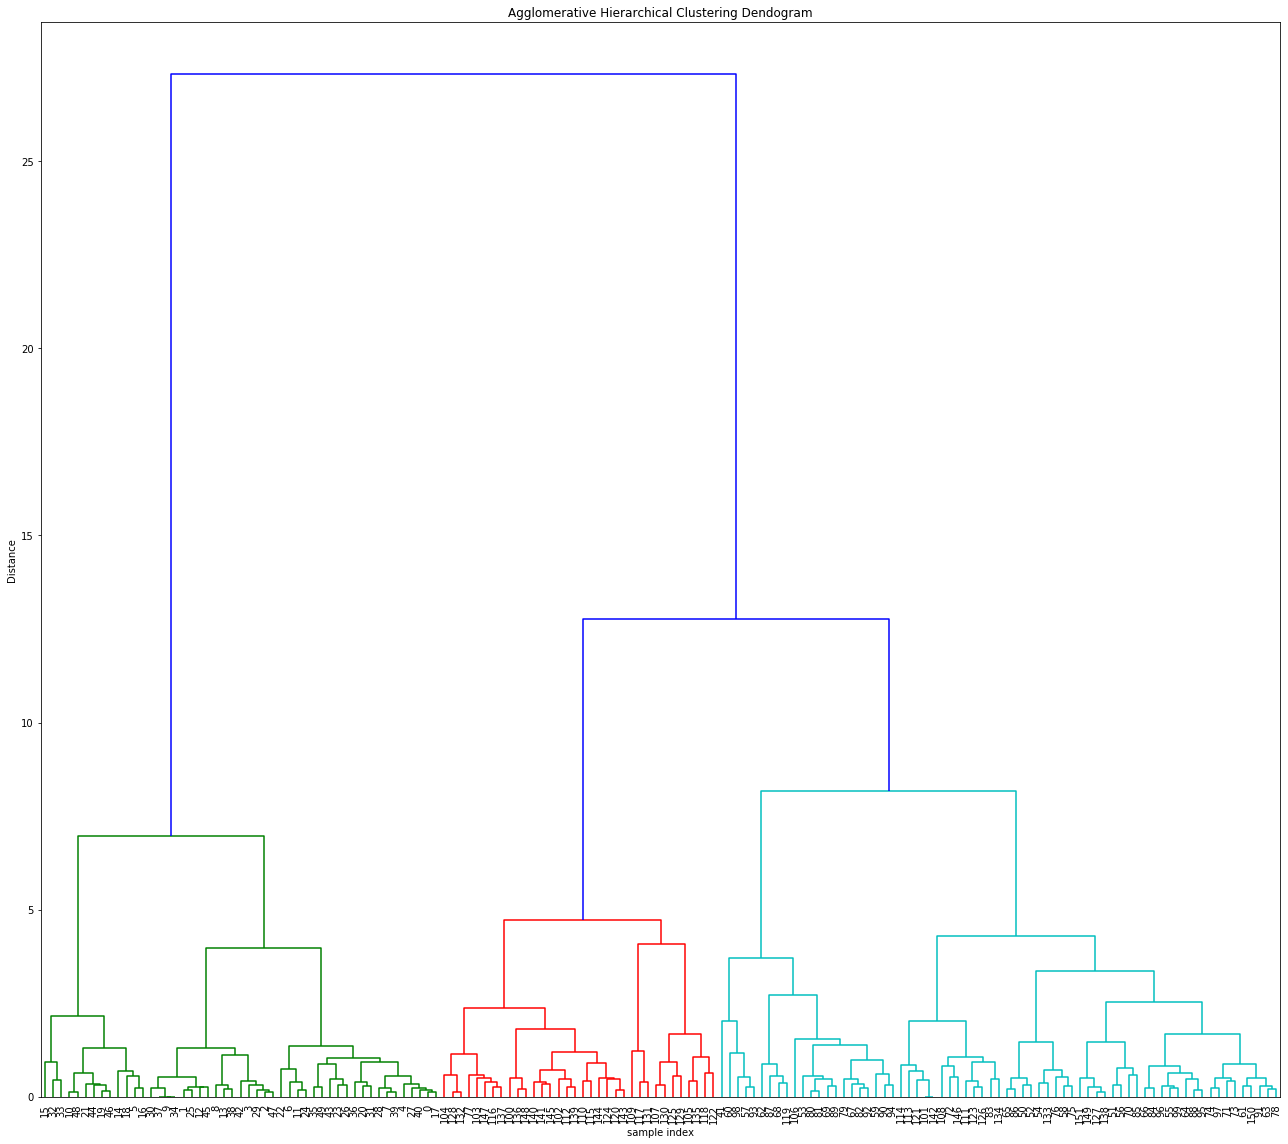

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(x_sc, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=30,color_threshold=10,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [110]:
km=KMeans(n_clusters=3,random_state=1)
km.fit(x_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [111]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2])

In [112]:
km_df=x_sc.copy()
km_df['group']=km.labels_
km_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,group
0,-0.90675,1.040463,-1.353632,-1.325008,1
1,-1.15069,-0.124120,-1.353632,-1.325008,1
2,-1.39463,0.341713,-1.410833,-1.325008,1
3,-1.51660,0.108797,-1.296431,-1.325008,1
4,-1.02872,1.273380,-1.353632,-1.325008,1


C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


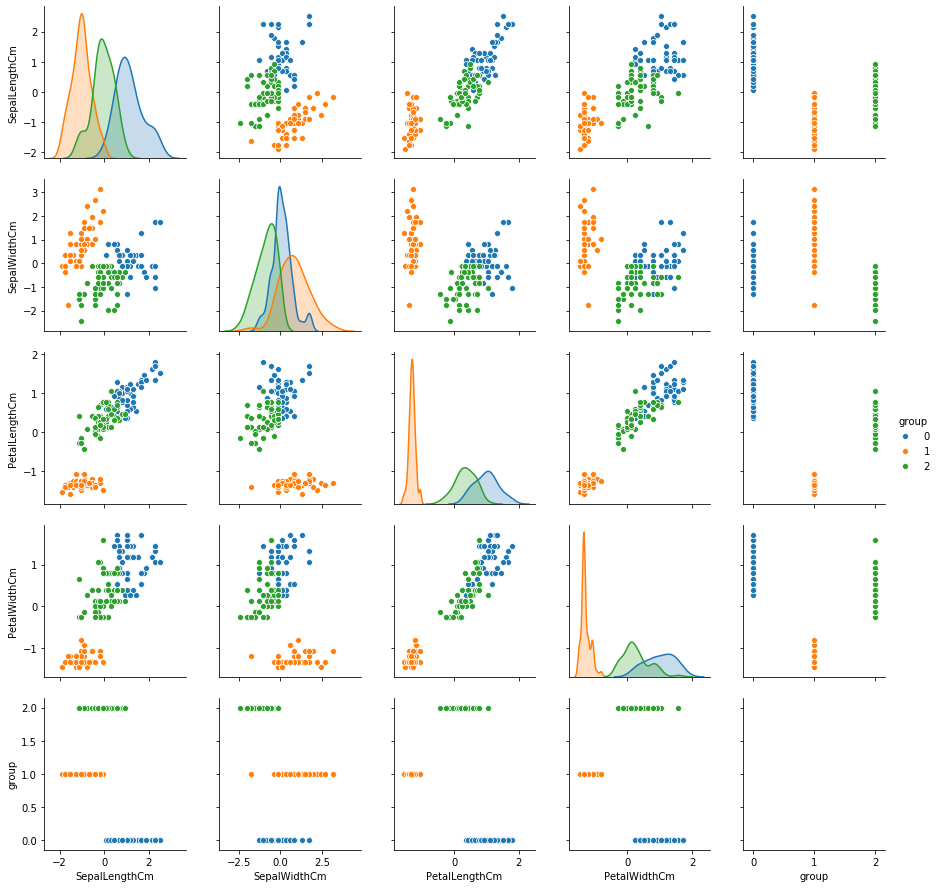

In [113]:
sns.pairplot(km_df,diag_kind='kde',hue='group')

In [114]:
#lets try to look with agglomerative clustering with 3 clusters

agg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agg.fit(x_sc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [115]:
agg_df=x_sc.copy()
agg_df['group']=agg.labels_
agg_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,group
0,-0.90675,1.040463,-1.353632,-1.325008,1
1,-1.15069,-0.124120,-1.353632,-1.325008,1
2,-1.39463,0.341713,-1.410833,-1.325008,1
3,-1.51660,0.108797,-1.296431,-1.325008,1
4,-1.02872,1.273380,-1.353632,-1.325008,1


C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


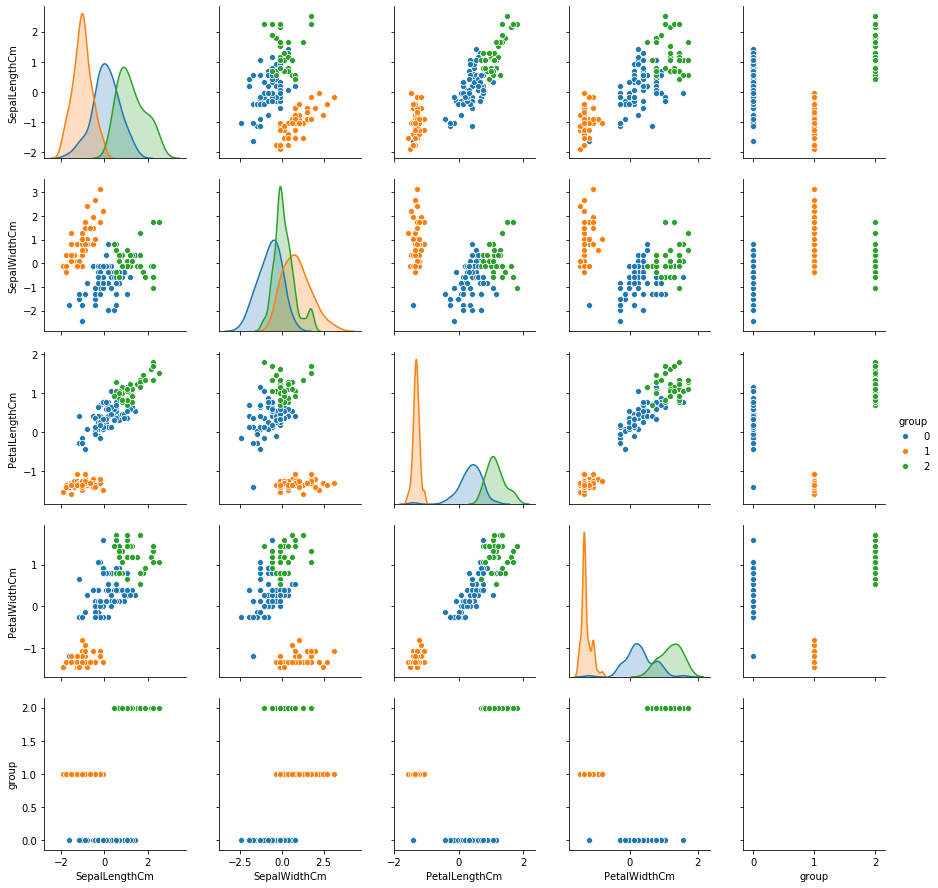

In [117]:
sns.pairplot(agg_df,diag_kind='kde',hue='group')

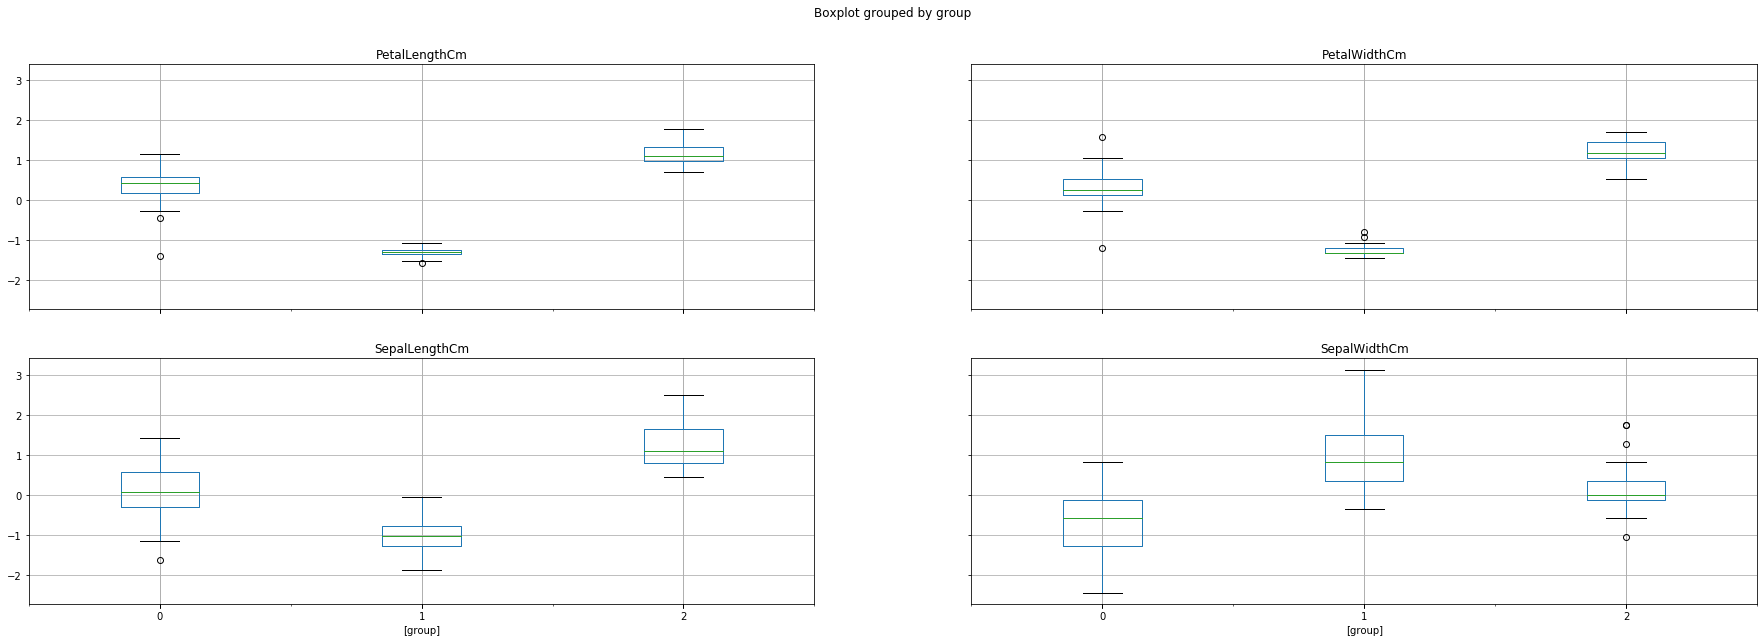

In [120]:
agg_df.boxplot(by='group',figsize=(30,10))
plt.show()

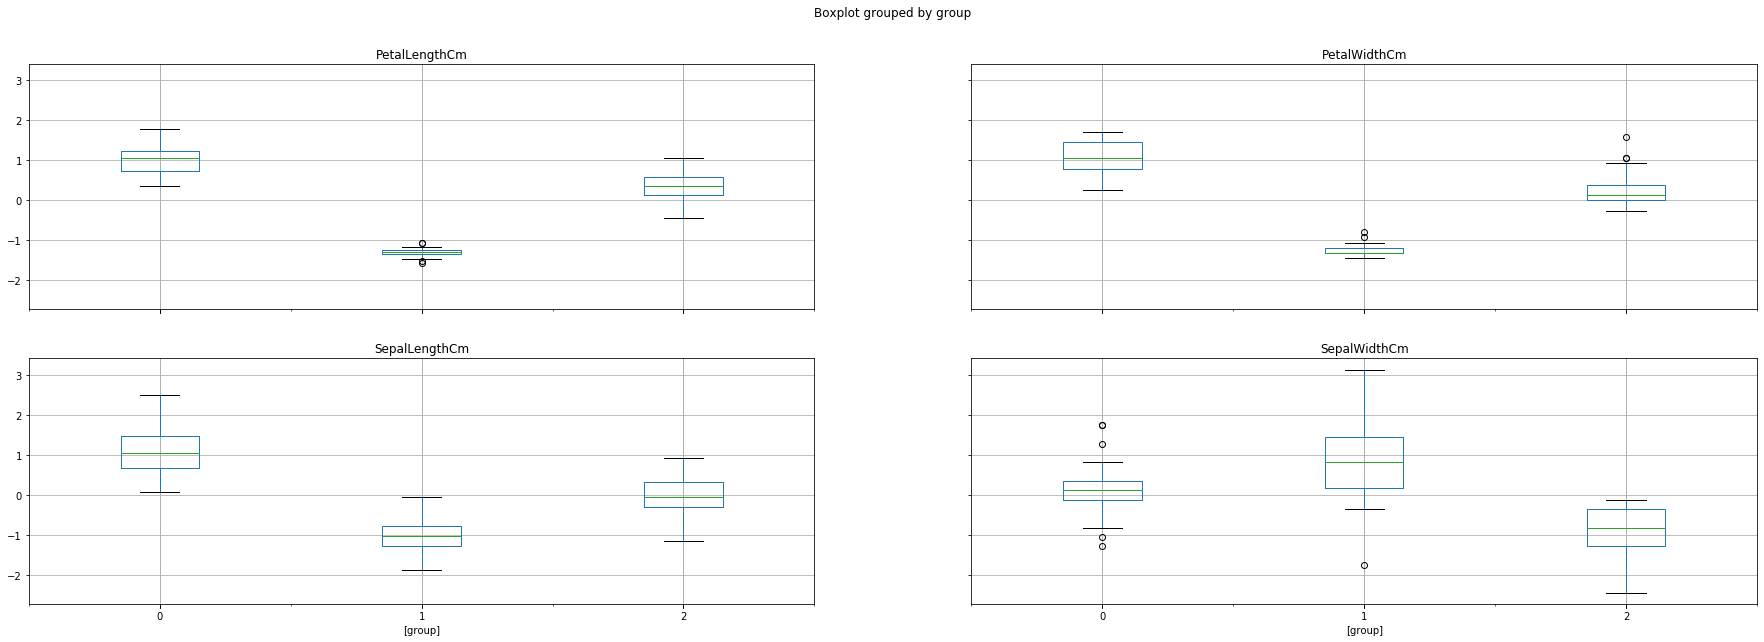

In [121]:
km_df.boxplot(by='group',figsize=(30,10))
plt.show()

In [123]:
agg_df.groupby('group').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
group,,,,
0,0.088454,-0.711475,0.365715,0.303811
1,-1.008807,0.902614,-1.315109,-1.268408
2,1.274359,0.143049,1.153118,1.211443


In [124]:
km_df.groupby('group').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
group,,,,
0,1.143383,0.098885,0.997695,1.015658
1,-1.021402,0.849471,-1.317023,-1.266899
2,-0.048525,-0.856749,0.344718,0.283800


In [126]:
km_df['group'].value_counts()

2    55
1    50
0    47
Name: group, dtype: int64

In [127]:
agg_df['group'].value_counts()

0    69
1    49
2    34
Name: group, dtype: int64